#College majors and employment
This notebook is based on the dataquest.io challenge "Summarizing data", available at https://www.dataquest.io/mission/113/challenge-summarizing-data/.

The American Community Survey is a survey run by the US Census Bureau that collects data on everything from the affordability of housing to employment rates for different industries. For this challenge, you'll be using the data derived from the American Community Survey for years 2010-2012. The team at FiveThirtyEight has cleaned the dataset and made it available on their Github repo (https://github.com/fivethirtyeight/data/tree/master/college-majors).

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# reading in the data. familiarzing oneself with it.
all_ages = pd.read_csv("all-ages.csv")
recent_grads = pd.read_csv("recent-grads.csv")
all_ages.head(5)

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000


Instructions

Use the Total column to calculate the number of people who fall under each Major_category and store the result as a separate dictionary for each dataset. The key for the dictionary should be the Major_category and the value should be the total count. For the counts fromall_ages, store the results as a dictionary named all_ages_major_categories and for the counts from recent_grads, store the results as a dictionary named recent_grads_major_categories.

In [20]:
all_ages_major_categories = dict((all_ages.pivot_table(index = "Major_category", values = "Total", aggfunc = sum)))

recent_grads_major_categories = dict((recent_grads.pivot_table(index = "Major_category", values = "Total", aggfunc = sum)))

Unsolicited seaborn plot for fun

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

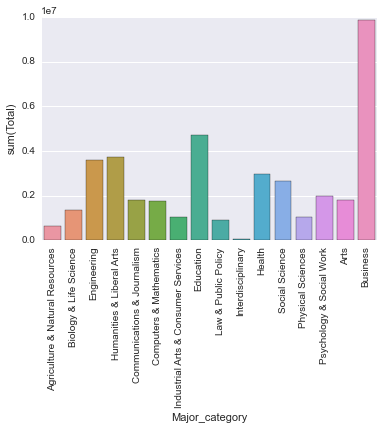

In [27]:
major_cat_plot = sns.barplot(x="Major_category", y="Total", ci = None, estimator = sum, data = all_ages)
plt.xticks(rotation=90)

The press likes to talk a lot about how many college grads are unable to get higher wage, skilled jobs and end up working lower wage, unskilled jobs instead. As a data person, it is your job to be skeptical of any broad claims and explore if you can acquire and analyze relevant data to obtain a more nuanced view. Let's run some basic calculations to explore that idea further.


Instructions

Use the Low_wage_jobs and Total columns to calculate the proportion of recent college graduates that worked low wage jobs. Store the resulting Float object of the calculation as low_wage_percent.

In [29]:
low_wage_recent_grads = recent_grads["Low_wage_jobs"].sum(axis=0)
total_recent_grads = recent_grads["Total"].sum(axis=0)

low_wage_percent = low_wage_recent_grads/total_recent_grads
print (low_wage_percent)

0.09852546076122913


Both all_ages and recent_grads datasets have 173 rows, corresponding to the 173 college major codes. This enables us to do some comparisons between the two datasets and perform some initial calculations to see how similar or different the statistics of recent college graduates are from those of the entire population.

Instructions

We want to know the number of majors where recent grads fare better than the overall population.

For each major:

* increment recent_grads_lower_emp_count if Unemployment_rate is lower for recent_grads
* increment all_ages_lower_emp_count if Unemployment_rate is lower for all_ages
* do nothing if Unemployment_rate is the same for both


In [30]:
# dataquest's solution using "value"-methods?!
majors = recent_grads['Major'].value_counts().index

recent_grads_lower_emp_count = 0
all_ages_lower_emp_count = 0
for m in majors:
    recent_grads_row =  recent_grads[recent_grads['Major'] == m]
    all_ages_row = all_ages[all_ages['Major'] == m]
    
    recent_grads_unemp_rate = recent_grads_row['Unemployment_rate'].values[0]
    all_ages_unemp_rate = all_ages_row['Unemployment_rate'].values[0]
    
    if recent_grads_unemp_rate < all_ages_unemp_rate:
        recent_grads_lower_emp_count += 1
    elif all_ages_unemp_rate < recent_grads_unemp_rate:
        all_ages_lower_emp_count += 1

In [31]:
print (recent_grads_lower_emp_count, all_ages_lower_emp_count)

43 128


In [32]:
# my solution using stuff I learned
majors = []
for i in recent_grads["Major"]:
    majors.append(i)

recent_grads_lower_emp_count = 0
all_ages_lower_emp_count = 0


for i in majors:
    recent_grads_row =  recent_grads[recent_grads['Major'] == i]
    all_ages_row = all_ages[all_ages['Major'] == i]
    
    float_recent_grads_unemp = float(recent_grads_row["Unemployment_rate"])
    float_all_ages_unemp = float(all_ages_row["Unemployment_rate"])
    
    if float_recent_grads_unemp < float_all_ages_unemp:
        recent_grads_lower_emp_count += 1
    if float_recent_grads_unemp > float_all_ages_unemp:
        all_ages_lower_emp_count += 1
    if float_recent_grads_unemp == float_all_ages_unemp:
        pass

In [33]:
print (recent_grads_lower_emp_count, all_ages_lower_emp_count)

43 128
